In [1]:
from pathlib import Path

from falkon.kernels import GaussianKernel
from falkon import FalkonOptions
import torch
import numpy as np


[KeOps] Warning : There were warnings or errors compiling formula :
<stdin>:1:10: fatal error: cuda.h: No such file or directory
compilation terminated.

[KeOps] Warning : 
    The location of Cuda header files cuda.h and nvrtc.h could not be detected on your system.
    You must determine their location and then define the environment variable CUDA_PATH,
    either before launching Python or using os.environ before importing keops. For example
    if these files are in /vol/cuda/10.2.89-cudnn7.6.4.38/include you can do :
      import os
      os.environ['CUDA_PATH'] = '/vol/cuda/10.2.89-cudnn7.6.4.38'
    


In [2]:
exp_path = Path('/home/novelli/dp_examples/chignolin')
data = np.load(exp_path / 'data/CLN025_heavy_pwisedist.npy')
data = torch.from_numpy(data)

In [6]:
ls = 0.02
GaussianKernel(ls, opt=FalkonOptions(use_cpu=True))

GaussianKernel(sigma=Parameter containing:
tensor([0.0200], dtype=torch.float64))

In [7]:
data.max(dim=0)

torch.return_types.max(
values=tensor([0.1683, 0.2811, 0.4184,  ..., 0.3976, 0.2686, 0.1536]),
indices=tensor([531508, 124168, 408833,  ...,  66234, 183131,  69147]))

In [4]:
data.std(dim=0)

tensor([0.0037, 0.0070, 0.0358,  ..., 0.0056, 0.0058, 0.0030])

In [10]:
data.norm(dim=0)

tensor([109.3726, 182.3667, 262.4490,  ..., 271.1360, 177.7347, 102.6274])

In [14]:
data_min = data[:100]
feature_mean = data_min.mean(dim=0, keepdim=True)
feature_std = data_min.std(dim=0, keepdim=True)
rsqrt_feature_dim = (data_min.shape[1])**-0.5
data_min = rsqrt_feature_dim*(data_min - feature_mean)/feature_std
pwdist = torch.cdist(data_min, data_min, p=2)

In [15]:
i, j = torch.tril_indices(pwdist.shape[0], pwdist.shape[1], offset=0)

In [21]:
ls = torch.median(pwdist[i, j])
kernel = GaussianKernel(ls, opt=FalkonOptions(use_cpu=True))

In [23]:
import matplotlib.pyplot as plt

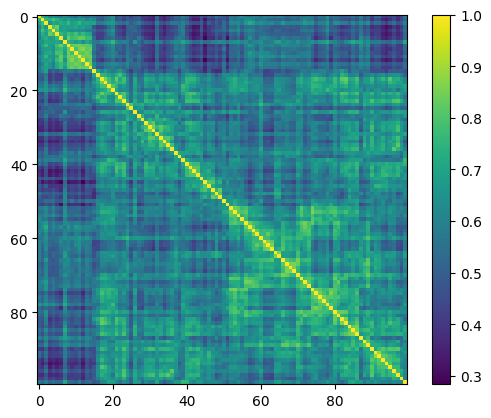

In [25]:
plt.imshow(kernel(data_min, data_min).numpy())
plt.colorbar()

In [27]:
import numpy as np
np.argsort(np.arange(10))[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])